In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#!ln -s /content/gdrive/My\ Drive/ /mydrive

In [6]:
%cd /My Drive/Yolov4

[Errno 2] No such file or directory: '/My Drive/Yolov4'
/content


In [8]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15277, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 15277 (delta 37), reused 53 (delta 31), pack-reused 15186
Receiving objects: 100% (15277/15277), 13.77 MiB | 19.45 MiB/s, done.
Resolving deltas: 100% (10348/10348), done.


In [9]:
%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/darknet


In [10]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old ==

In [11]:
!wget https://github.com/AlexyAB/darknet/releases/download/darknet_yolo_v3_optional/yolov4.weights

--2021-07-18 09:33:06--  https://github.com/AlexyAB/darknet/releases/download/darknet_yolo_v3_optional/yolov4.weights
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-18 09:33:06 ERROR 404: Not Found.



In [12]:
!chmod +x ./darknet

In [13]:
!python process.py

python3: can't open file 'process.py': [Errno 2] No such file or directory


In [14]:
!./darknet detector train data/obj.data cfg/yolov4-custom.cfg yolov4.conv.137 -dont_show -map

CUDA status Error: file: ./src/dark_cuda.c : () : line: 39 : build time: Jul 18 2021 - 09:27:51 

 CUDA Error: no CUDA-capable device is detected
Darknet error location: ./src/dark_cuda.c, check_error, line #70
CUDA Error: no CUDA-capable device is detected: Bad file descriptor


In [15]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [16]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [17]:
!./darknet detector test data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_best.weights /mydrive/mask_test_images/image1.jpg -thresh 0.3

CUDA status Error: file: ./src/dark_cuda.c : () : line: 39 : build time: Jul 18 2021 - 09:27:51 

 CUDA Error: no CUDA-capable device is detected
Darknet error location: ./src/dark_cuda.c, check_error, line #70
CUDA Error: no CUDA-capable device is detected: Bad file descriptor


In [18]:
from google.colab import files
upload = files.upload()

Saving sample.png to sample.png


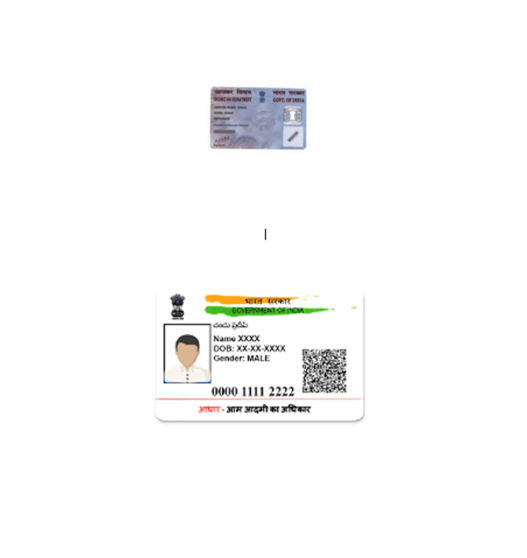

In [19]:
imShow('sample.png')

CUDA status Error: file: ./src/dark_cuda.c : () : line: 39 : build time: Jul 18 2021 - 09:27:51 

 CUDA Error: no CUDA-capable device is detected
Darknet error location: ./src/dark_cuda.c, check_error, line #70
CUDA Error: no CUDA-capable device is detected: Bad file descriptor


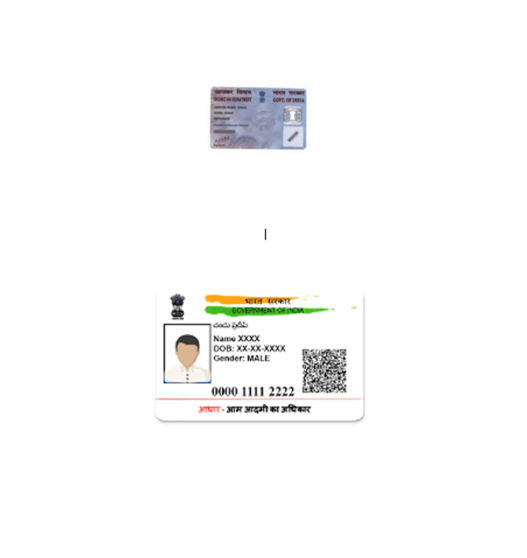

In [21]:
!./darknet detector test data/obj.data cfg/yolov4-custom.cfg /My Drive/yolov4/training/yolov4-custom_best.weights /My Drive/yolov4/test.jpg -thresh 0.3
imShow('sample.png')